In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time


import sys
sys.path.insert(1, '../Files')

import logo
from constants import Units, Constants
import SNprofiles
import ALPnucleonINT as ALPint


In [2]:
%load_ext autoreload
%autoreload 2

Check if everything is ok

In [3]:
logo.logo()


      ____  _   _   _____          _                 _\/_
     / ___|| \ | | |  ___|_ _  ___| |_ ___  _ __ _   _/\ 
     \___ \|  \| | | |_ / _` |/ __| __/ _ \| '__| | | |
      ___) | |\  | |  _| (_| | (__| || (_) | |  | |_| |
     |____/|_| \_| |_|  \__,_|\___|\__\___/|_|   \__, |
                                                 |___/ 
                                            
                Baking particles since 1987!
                         v.beta.1
    


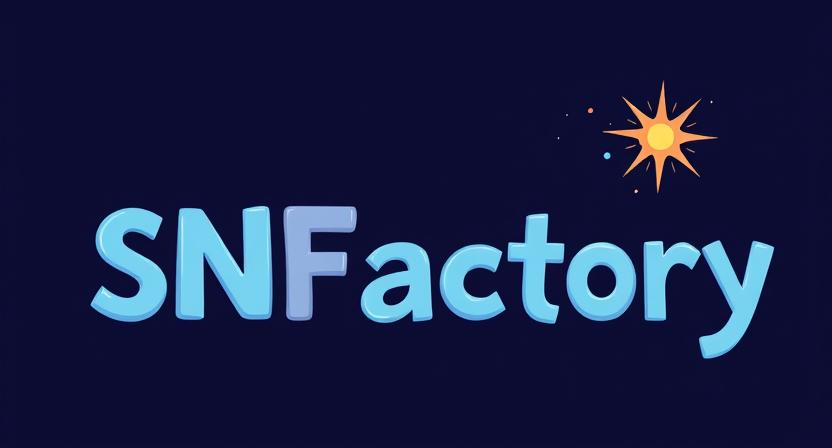

In [4]:
logo.logoIMG()

# 1. SN Profiles

First, we have to load the SN model.

This are the SN profiles density, temperature, etc as a function of the radius.

SNFactory includes default profiles ready to use: 1D a 18M⊙ progenitor simulated
in spherical symmetry with the AGILE-BOLTZTRAN code, taken from:

T. Fischer, P. Carenza, B. Fore, M. Giannotti, A. Mirizzi and S. Reddy, Observable
signatures of enhanced axion emission from protoneutron stars, Phys. Rev. D 104 (2021)
103012 [2108.13726]

R.Z. Ferreira, M.C.D. Marsh and E. Müller, Strong supernovae bounds on ALPs from
quantum loops, JCAP 11 (2022) 057 [2205.07896]

---------------

To compute/load the SN profiles you have class $\bf{SNprofiles}$ defined in the imported module $\bf{SNprofiles}$

Inputs (the path to the profiles): 
- rho: density
- Ye: fraction of electrons/protons
- T: temperature
- mphoton: effective photon mass
- npeff: effective proton number density
- echempot: electron chemical potential
- lapse: lapse function (there is a boolean to decide to compute it or use a saved lapse)

In [7]:
# folder where the profiles are stored
dir_profiles = "../ConfigFiles/SN-profiles/18MsolProgenitor-AB/"

# profiles
rho_file = dir_profiles + "rho_PROF1.dat"
Ye_file = dir_profiles + "Ye_PROF1.dat"
T_file = dir_profiles + "T_PROF1.dat"
lapse_file = dir_profiles + "lapse_PROF1.dat"
mphoton_file = dir_profiles + "mphoton_PROF1.dat"
npeff_file = dir_profiles + "npeff_PROF1.dat"
echempot_file = dir_profiles + "echempot_PROF1.dat"
Ymu_file = dir_profiles + "Ymu_PROF1.dat"
Ypi_file = dir_profiles + "Ypi_VIR_PROF1.dat"


#####################
# LOAD THE PROFILES #
#####################
# if use_saved_lapse=True uses the data in the "lapse_file", if False computes it and saves it in "lapse_file"

SN_prof = SNprofiles.SNprofiles_QCDALP(rho_file, 
                                       Ye_file, 
                                       T_file, 
                                       mphoton_file, 
                                       npeff_file, 
                                       echempot_file, 
                                       Ymu_file, 
                                       Ypi_file, 
                                       use_saved_lapse=True, lapse_file=lapse_file)


# SN_prof.rho(r)                          density [MeV^4]
# SN_prof.Yn(r) or Yp(r) or Ye(r)         fraction of neutrons, protons, or electrons
# SN_prof.Yparticle(r, particle)          same as above but you have to specify "n" or "p" 
# SN_prof.nnF(r) or npF(r) or nbF(r)      number density of neutrons, protons, or barions [MeV^3]
# SN_prof.T(r)                            temperature [MeV]
# SN_prof.mnstar(r)                       effective nucleon mass [MeV]
# SN_prof.etan(r) or etap(r)              neutron or proton degeneracy parameter [MeV]
# SN_prof.etaparticle(r, particle)        same as above but you have to specify "n" or "p" 
# SN_prof.lapse(r)                        lapse function (TAKES TIME TO COMPUTE)
# SN_prof.mphoton(r)                      effective photon mass in the SN plasma [MeV]
# SN_prof.npeff(r)                        effective proton number density [MeV^3]
# SN_prof.echempot(r)                     electron chemical potential [MeV]

Some SN profile plots

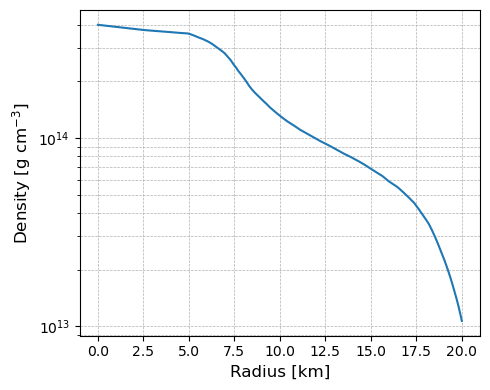

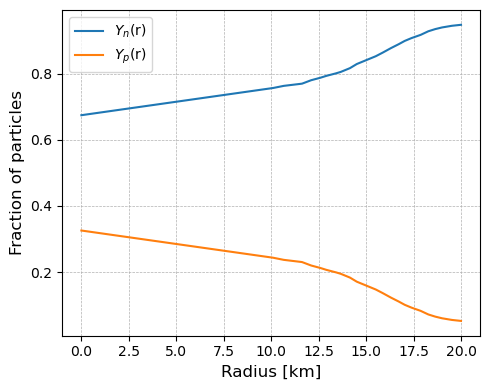

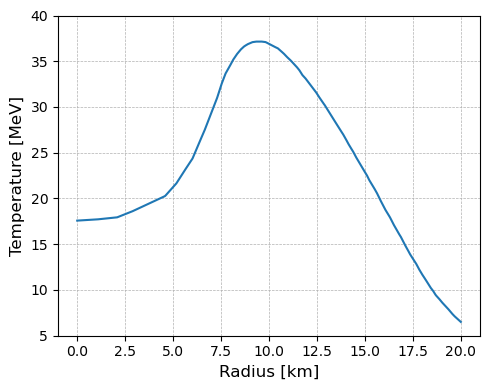

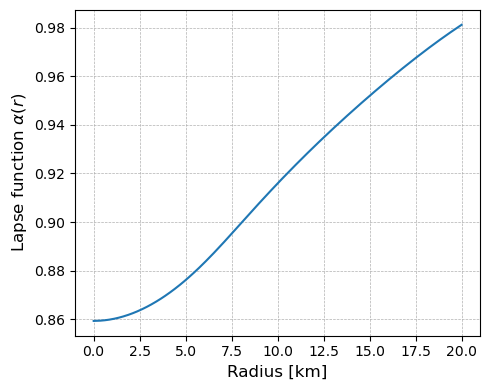

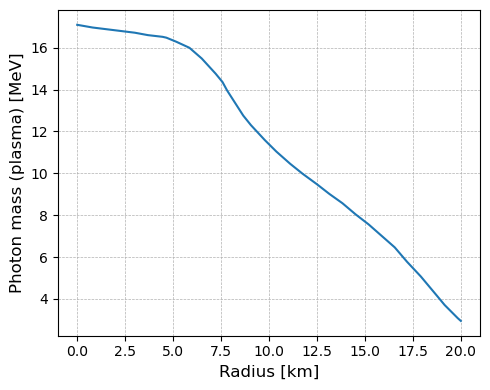

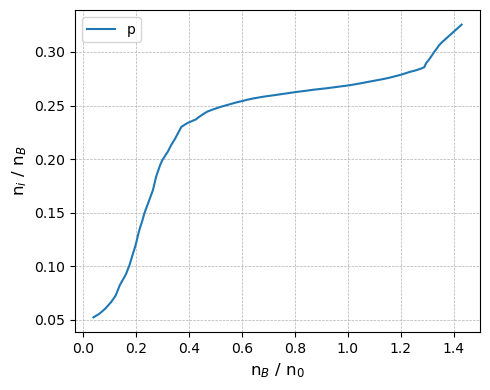

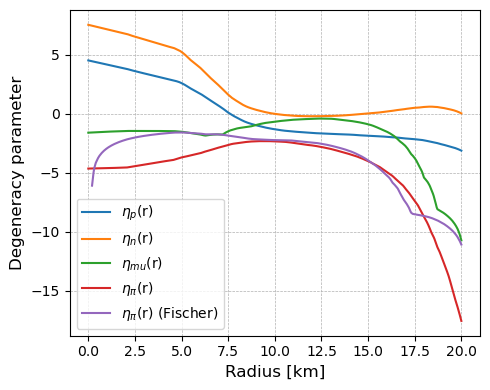

In [8]:
rad_plt = np.linspace(0, 20, 500) 

rho_plt = [SN_prof.rho(r) * ((Units.cmminus1toMeV**3) / (Units.MeVtokg * 1000))**(-1) for r in rad_plt]
Yn_plt = [SN_prof.Yn(r) for r in rad_plt]
Yp_plt = [SN_prof.Yp(r) for r in rad_plt]
T_plt = [SN_prof.T(r) for r in rad_plt]
lapse_plt = [SN_prof.lapse(r) for r in rad_plt]
mphot_plt = [SN_prof.mphoton(r) for r in rad_plt]


plt.figure(figsize=(5, 4))
plt.plot(rad_plt, rho_plt)
plt.xscale("linear")
plt.yscale("log")
plt.xlabel("Radius [km]", fontsize=12)
plt.ylabel(r"Density [g cm$^{-3}$]", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
plt.plot(rad_plt, Yn_plt, label="$Y_n$(r)")
plt.plot(rad_plt, Yp_plt, label="$Y_p$(r)")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Radius [km]", fontsize=12)
plt.ylabel(r"Fraction of particles", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
plt.plot(rad_plt, T_plt, label="T(r)")
plt.xscale("linear")
plt.yscale("linear")
plt.ylim(5,40)
plt.xlabel("Radius [km]", fontsize=12)
plt.ylabel(r"Temperature [MeV]", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
plt.plot(rad_plt, lapse_plt, label="ρ(r)")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Radius [km]", fontsize=12)
plt.ylabel(r"Lapse function $\alpha(r)$", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(5, 4))
plt.plot(rad_plt, mphot_plt, label="ρ(r)")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Radius [km]", fontsize=12)
plt.ylabel(r"Photon mass (plasma) [MeV]", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()


#----------#

n_0 = 2.8e14  # nuclear saturation density [g/cm**3]

rho_div_rho0_plt = [(1/n_0) * SN_prof.rho(r) * ((Units.cmminus1toMeV**3) / (Units.MeVtokg * 1000))**(-1) for r in rad_plt]

plt.figure(figsize=(5, 4))
plt.plot(rho_div_rho0_plt, Yp_plt, label = 'p')

# plt.xlim([0.,1.5])
# plt.ylim([0.15,0.3])
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("n$_B$ / n$_0$", fontsize=12)
plt.ylabel(r"n$_i$ / n$_B$", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()



etap_plt = [SN_prof.etap(r) for r in rad_plt]
etan_plt = [SN_prof.etan(r) for r in rad_plt]
etamu_plt = [SN_prof.etamu(r) for r in rad_plt]
etapi_plt = [SN_prof.etapi(r) for r in rad_plt]
etapi_F_plt = [SN_prof.etapi_F(r) for r in rad_plt]

plt.figure(figsize=(5, 4))
plt.plot(rad_plt, etap_plt, label="$\eta_{p}$(r)")
plt.plot(rad_plt, etan_plt, label="$\eta_{n}$(r)")
plt.plot(rad_plt, etamu_plt, label="$\eta_{mu}$(r)")
plt.plot(rad_plt, etapi_plt, label="$\eta_{\pi}$(r)")
plt.plot(rad_plt, etapi_F_plt, label="$\eta_{\pi}$(r) (Fischer)")

# plt.xlim([0.,80])
# plt.ylim([0,0.6])
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Radius [km]", fontsize=12)
plt.ylabel(r"Degeneracy parameter", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# 2. ALP-nucleon interactions

The ALP-nucleon interaction in this tutorial can be described by the following Lagrangian:

<img src="imgs/ALP-nucleon-Lagrangian.png" alt="Bremsstrahlung" width="600">

The ALP model is goind to be determined by the coupling pair ($C_{ap}$, $C_{an}$).

While the coupling strength $g_a$ and ALP mass, $m_a$, are the free parameters of the model.



- Model fixed by: ($C_{ap}$, $C_{an}$)

- Free parameters: ($g_a$, $m_a$)

# Interactions

For this example there are several $\bf{Interaction \, Classes}$ defined in the imported module $\bf{ALPint}$
 - ALP_Brems      $\hspace{2.1cm}$  Bremsstrahlung
 - ALP_Pion       $\hspace{2.4cm}$  Pionic conversion
 - ALP_Photon     $\hspace{2cm}$  Photo-production   $\gamma$ p $\rightarrow$ p a
 - ALP_DIpole     $\hspace{2.1cm}$  Dipole Interaction

# 2.1. Bremsstrahlung

Bremsstrahlung in a SN. 

P. Carenza, Axion emission from supernovae: a cheatsheet, Eur. Phys. J. Plus 138 (2023) 836 [2309.14798].

<img src="imgs/bremss.png" alt="Bremsstrahlung" width="350">

## Nuclear Structure Function (NSF)

To compute the nucleon-nucleon Bremsstrahlung process we need to compute the Nuclear Structur Function for each ALP model. 

BUT IT TAKES TIME!

SN factory includes pre-computed nuclear structure functions for 6 different coupling pairs using the default SN profiles.

 - use_saved_sx=True  --->   then do not compute NSF and use the already saved ones
 - use_saved_sx=False --->   compute the NSF and save them

Below we show how to compute them:

### Compute and save the NSF
#### WARNING TAKES TIME!  (USE THE ALREADY SAVED ONE BELOW!)

Here we compute and save the NSF for 6 models, it takes time.

REMEMBER! Use the saved s(Ea,rad) if already computed or using the default SN profiles.

structure function s(Ea,rad) grid saved in:  ../ConfigFiles/SN-structurefunc/sx_grid_11_USER.dat
structure function s(Ea,rad) grid saved in:  ../ConfigFiles/SN-structurefunc/sx_grid_10_USER.dat
structure function s(Ea,rad) grid saved in:  ../ConfigFiles/SN-structurefunc/sx_grid_01_USER.dat
structure function s(Ea,rad) grid saved in:  ../ConfigFiles/SN-structurefunc/sx_grid_KSVZ_USER.dat
structure function s(Ea,rad) grid saved in:  ../ConfigFiles/SN-structurefunc/sx_grid_DFSZ_USER.dat
structure function s(Ea,rad) grid saved in:  ../ConfigFiles/SN-structurefunc/sx_grid_DFSZ2_USER.dat


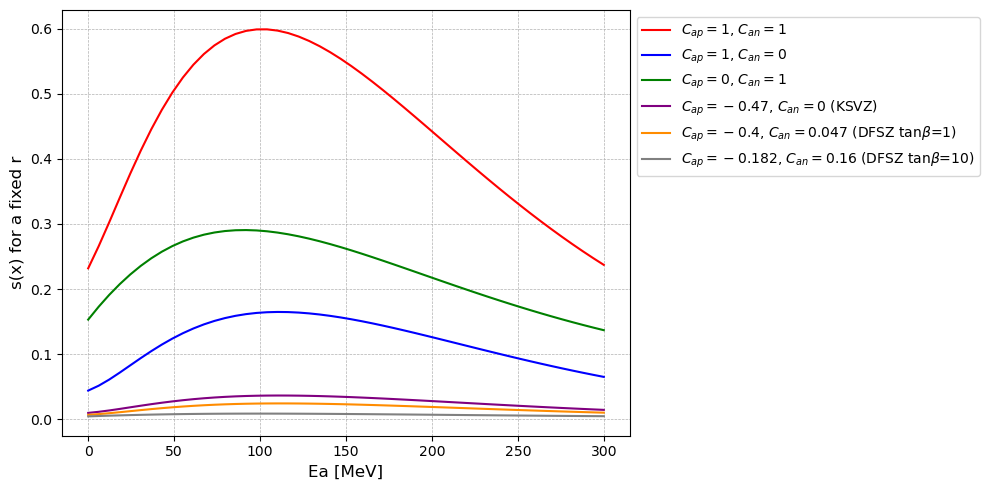

In [44]:
# folder where the NSF are stored
dir_NSF = "../ConfigFiles/SN-structurefunc/"

sx_file_tosave_11 = dir_NSF + "sx_grid_11_USER.dat"
sx_file_tosave_10 = dir_NSF + "sx_grid_10_USER.dat"
sx_file_tosave_01 = dir_NSF + "sx_grid_01_USER.dat"
sx_file_tosave_KSVZ = dir_NSF + "sx_grid_KSVZ_USER.dat"
sx_file_tosave_DFSZ = dir_NSF + "sx_grid_DFSZ_USER.dat"
sx_file_tosave_DFSZ2 = dir_NSF + "sx_grid_DFSZ2_USER.dat"


NSF_11 = ALPint.NuclStructFunc(Cap=1, Can=1, profile=SN_prof, use_saved_sx=False, sx_file=sx_file_tosave_11)
NSF_10 = ALPint.NuclStructFunc(Cap=1, Can=0, profile=SN_prof, use_saved_sx=False, sx_file=sx_file_tosave_10)
NSF_01 = ALPint.NuclStructFunc(Cap=0, Can=1, profile=SN_prof, use_saved_sx=False, sx_file=sx_file_tosave_01)
NSF_KSVZ = ALPint.NuclStructFunc(Cap=-0.47, Can=0, profile=SN_prof, use_saved_sx=False, sx_file=sx_file_tosave_KSVZ)
NSF_DFSZ = ALPint.NuclStructFunc(Cap=-0.4, Can=0.047, profile=SN_prof, use_saved_sx=False, sx_file=sx_file_tosave_DFSZ)
NSF_DFSZ2 = ALPint.NuclStructFunc(Cap=-0.182, Can=0.16, profile=SN_prof, use_saved_sx=False, sx_file=sx_file_tosave_DFSZ2)



# Now lets plot it for a fixed r as an example
radTEST = 15 # km 
Ea_plt = np.linspace(0, 300, 50) # MeV

sx_11_radTEST_plt = [NSF_11.sx_func([Ea,radTEST]) for Ea in Ea_plt]
sx_10_radTEST_plt = [NSF_10.sx_func([[Ea,radTEST]]) for Ea in Ea_plt]
sx_01_radTEST_plt = [NSF_01.sx_func([[Ea,radTEST]]) for Ea in Ea_plt]
sx_KSVZ_radTEST_plt = [NSF_KSVZ.sx_func([[Ea,radTEST]]) for Ea in Ea_plt]
sx_DFSZ_radTEST_plt = [NSF_DFSZ.sx_func([[Ea,radTEST]]) for Ea in Ea_plt]
sx_DFSZ2_radTEST_plt = [NSF_DFSZ2.sx_func([[Ea,radTEST]]) for Ea in Ea_plt]



# plot
plt.figure(figsize=(10, 5))
plt.plot(Ea_plt, sx_11_radTEST_plt, color='red', label="$C_{ap}=1$, $C_{an}=1$")
plt.plot(Ea_plt, sx_10_radTEST_plt, color='blue', label="$C_{ap}=1$, $C_{an}=0$")
plt.plot(Ea_plt, sx_01_radTEST_plt, color='green', label="$C_{ap}=0$, $C_{an}=1$")
plt.plot(Ea_plt, sx_KSVZ_radTEST_plt, color='purple', label="$C_{ap}=-0.47$, $C_{an}=0$ (KSVZ)")
plt.plot(Ea_plt, sx_DFSZ_radTEST_plt, color='darkorange', label=r"$C_{ap}=-0.4$, $C_{an}=0.047$ (DFSZ tan$\beta$=1)")
plt.plot(Ea_plt, sx_DFSZ2_radTEST_plt, color='gray', label=r"$C_{ap}=-0.182$, $C_{an}=0.16$ (DFSZ tan$\beta$=10)")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Ea [MeV]", fontsize=12)
plt.ylabel(r"s(x) for a fixed r", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

### Load the NSF

If you use the default SN profiles (or already computed them)

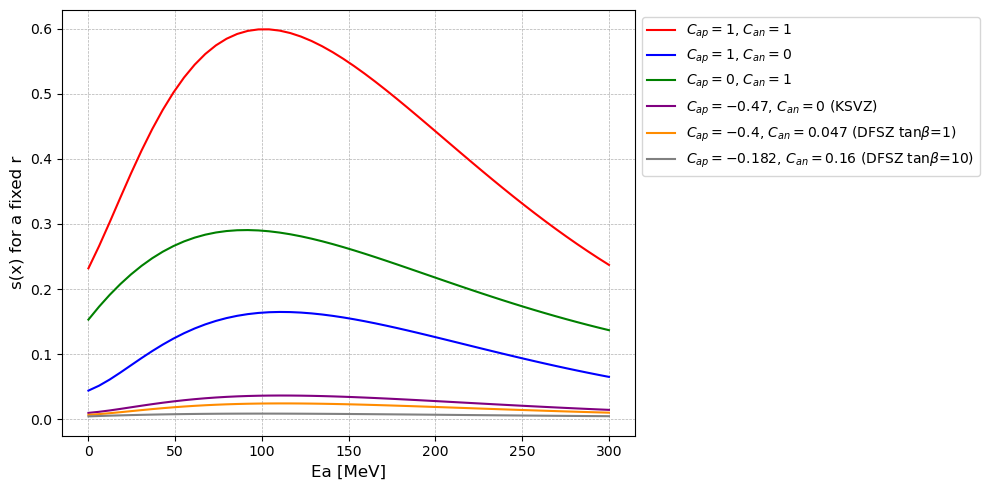

In [9]:
# folder where the NSF are stored
dir_NSF = "../ConfigFiles/SN-structurefunc/"

sx_file_11 = dir_NSF + "sx_grid_11.dat"
sx_file_10 = dir_NSF + "sx_grid_10.dat"
sx_file_01 = dir_NSF + "sx_grid_01.dat"
sx_file_KSVZ = dir_NSF + "sx_grid_KSVZ.dat"
sx_file_DFSZ = dir_NSF + "sx_grid_DFSZ.dat"
sx_file_DFSZ2 = dir_NSF + "sx_grid_DFSZ2.dat"

NSF_11 = ALPint.NuclStructFunc(Cap=1, Can=1, profile=SN_prof, use_saved_sx=True, sx_file=sx_file_11)
NSF_10 = ALPint.NuclStructFunc(Cap=1, Can=0, profile=SN_prof, use_saved_sx=True, sx_file=sx_file_10)
NSF_01 = ALPint.NuclStructFunc(Cap=0, Can=1, profile=SN_prof, use_saved_sx=True, sx_file=sx_file_01)
NSF_KSVZ = ALPint.NuclStructFunc(Cap=-0.47, Can=0, profile=SN_prof, use_saved_sx=True, sx_file=sx_file_KSVZ)
NSF_DFSZ = ALPint.NuclStructFunc(Cap=-0.4, Can=0.047, profile=SN_prof, use_saved_sx=True, sx_file=sx_file_DFSZ)
NSF_DFSZ2 = ALPint.NuclStructFunc(Cap=-0.182, Can=0.16, profile=SN_prof, use_saved_sx=True, sx_file=sx_file_DFSZ2)



# Now lets plot it for a fixed r as an example
radTEST = 15 # km 
Ea_plt = np.linspace(0, 300, 50) # MeV

sx_11_radTEST_plt = [NSF_11.sx_func([Ea,radTEST]) for Ea in Ea_plt]
sx_10_radTEST_plt = [NSF_10.sx_func([[Ea,radTEST]]) for Ea in Ea_plt]
sx_01_radTEST_plt = [NSF_01.sx_func([[Ea,radTEST]]) for Ea in Ea_plt]
sx_KSVZ_radTEST_plt = [NSF_KSVZ.sx_func([[Ea,radTEST]]) for Ea in Ea_plt]
sx_DFSZ_radTEST_plt = [NSF_DFSZ.sx_func([[Ea,radTEST]]) for Ea in Ea_plt]
sx_DFSZ2_radTEST_plt = [NSF_DFSZ2.sx_func([[Ea,radTEST]]) for Ea in Ea_plt]



# plot
plt.figure(figsize=(10, 5))
plt.plot(Ea_plt, sx_11_radTEST_plt, color='red', label="$C_{ap}=1$, $C_{an}=1$")
plt.plot(Ea_plt, sx_10_radTEST_plt, color='blue', label="$C_{ap}=1$, $C_{an}=0$")
plt.plot(Ea_plt, sx_01_radTEST_plt, color='green', label="$C_{ap}=0$, $C_{an}=1$")
plt.plot(Ea_plt, sx_KSVZ_radTEST_plt, color='purple', label="$C_{ap}=-0.47$, $C_{an}=0$ (KSVZ)")
plt.plot(Ea_plt, sx_DFSZ_radTEST_plt, color='darkorange', label=r"$C_{ap}=-0.4$, $C_{an}=0.047$ (DFSZ tan$\beta$=1)")
plt.plot(Ea_plt, sx_DFSZ2_radTEST_plt, color='gray', label=r"$C_{ap}=-0.182$, $C_{an}=0.16$ (DFSZ tan$\beta$=10)")
plt.xscale("linear")
plt.yscale("linear")
plt.xlabel("Ea [MeV]", fontsize=12)
plt.ylabel(r"s(x) for a fixed r", fontsize=12)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

## Set up bremsstrahlung

Inputs: SN profiles, and the Nuclear Structure Functions (NSF)

Remember: the coupling to define the model are set in the NSF !

In [10]:
brems_11 = ALPint.ALP_Brems( profile=SN_prof, NuclStruct=NSF_11)
brems_10 = ALPint.ALP_Brems( profile=SN_prof, NuclStruct=NSF_10)
brems_01 = ALPint.ALP_Brems( profile=SN_prof, NuclStruct=NSF_01)
brems_KSVZ = ALPint.ALP_Brems( profile=SN_prof, NuclStruct=NSF_KSVZ)
brems_DFSZ = ALPint.ALP_Brems( profile=SN_prof, NuclStruct=NSF_DFSZ)
brems_DFSZ2 = ALPint.ALP_Brems( profile=SN_prof, NuclStruct=NSF_DFSZ2)

# 2.2 Pionic conversion

P. Carenza, Axion emission from supernovae: a cheatsheet, Eur. Phys. J. Plus 138 (2023) 836 [2309.14798]

<img src="imgs/pionic2.png" alt="pionconversion" width="290">
<img src="imgs/pionic1.png" alt="pionconversion" width="375">


## Set up the pionic conversion

Inputs: Couplings to define the model, and the SN profiles

In [11]:
pion_11 = ALPint.ALP_Pion(Cap=1, Can=1, profile=SN_prof )
pion_10 = ALPint.ALP_Pion(Cap=1, Can=0, profile=SN_prof )
pion_01 = ALPint.ALP_Pion(Cap=0, Can=1, profile=SN_prof )
pion_KSVZ = ALPint.ALP_Pion(Cap=-0.47, Can=0, profile=SN_prof )
pion_DFSZ = ALPint.ALP_Pion(Cap=-0.4, Can=0.047, profile=SN_prof )
pion_DFSZ2 = ALPint.ALP_Pion(Cap=-0.182, Can=0.16, profile=SN_prof )

# 2.3 Photo-production   $\gamma$ p $\rightarrow$ p a

D. Alonso-González, D. Cerdeño, M. Cermeño and A.D. Perez, Probing a diffuse flux of axion-like particles from galactic supernovae with neutrino water Cherenkov detectors, Phys.Rev.D 111 (2025) 8, 083019, Phys.Rev.D 112 (2025) 2, 029901 (erratum) [2412.09595]

<img src="imgs/photoprod1.png" alt="photoproduction" width="290">
<img src="imgs/photoprod2.png" alt="photoproduction" width="290">

## Set up the ALP photoproduction

Inputs: Couplings to define the model, and the SN profiles

In [12]:
ALPphoton_11 = ALPint.ALP_Photon( Cap=-1, profile=SN_prof)
ALPphoton_10 = ALPint.ALP_Photon( Cap=-1, profile=SN_prof)
ALPphoton_01 = ALPint.ALP_Photon( Cap=-0, profile=SN_prof)
ALPphoton_KSVZ = ALPint.ALP_Photon( Cap=-0.47, profile=SN_prof)
ALPphoton_DFSZ = ALPint.ALP_Photon( Cap=-0.4, profile=SN_prof)
ALPphoton_DFSZ2 = ALPint.ALP_Photon( Cap=-0.182, profile=SN_prof)

# 2.4 Dipole interaction

G. Lucente, L. Mastrototaro, P. Carenza, L. Di Luzio, M. Giannotti, A. Mirizzi, Axion signatures from supernova explosions through the nucleon electric-dipole portal, Phys. Rev. D 105, 123020 (2022) [2203.15812]

<img src="imgs/dipole.png" alt="dipole" width="290">

## Set up the ALP dipole interaction

Inputs: Couplings to define the model, and the SN profiles

In [13]:
ALPdipole = ALPint.ALP_Dipole( Capgamma=-0.0033, Cangamma=0.0033, profile=SN_prof)

### Production

<img src="imgs/prod.png" alt="production" width="1000">

Inside each $\bf{Interaction \, Class}$ there is a function:

 - dndEdt(Ea, rad, ma, ga) $\, \rightarrow \,$ Units: $[MeV^3]$

to compute the produced number density of ALP per unit of energy and time

##### Example for KSVZ model and fixed parameters

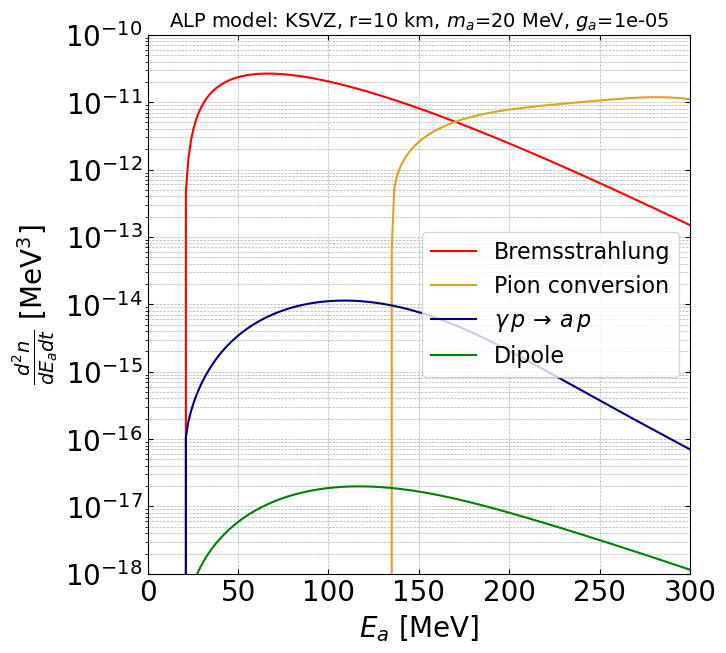

In [15]:
# Now lets plot it for an example
radTEST = 10 # km
maTEST = 20 # MeV
gaTEST = 1e-5


# and for a range of ALP energies
Ea_plt = np.linspace(0.1, 350, 250) # MeV


# Bremsstrahlung: dndEdt(self, Ea, rad, ma, ga)
brems_dndEdt_KSVZ_plt = [brems_KSVZ.dndEdt(EE, radTEST, maTEST, gaTEST) for EE in Ea_plt] 

# Pionic conversion: dndEdt(self, Ea, rad, ma, ga, particleIN="p", particleOUT="n")
pion_dndEdt_KSVZ_plt = [pion_KSVZ.dndEdt(EE, radTEST, maTEST, gaTEST, "p", "n") for EE in Ea_plt] 

# ALP photoproduction: dndEdt(self, Ea, rad, ma, ga)
photon_dndEdt_KSVZ_plt = [ALPphoton_KSVZ.dndEdt(EE, radTEST, maTEST, gaTEST) for EE in Ea_plt] 

# Dipole interaction: dndEdt(self, Ea, rad, ma, ga)
dipole_dndEdt_plt = [ALPdipole.dndEdt(EE, radTEST, maTEST, gaTEST) for EE in Ea_plt] 




# plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

plt.plot(Ea_plt, brems_dndEdt_KSVZ_plt, color='red', label="Bremsstrahlung")
plt.plot(Ea_plt, pion_dndEdt_KSVZ_plt, color='goldenrod', label="Pion conversion")
plt.plot(Ea_plt, photon_dndEdt_KSVZ_plt, color='navy', label=r"$\gamma \, p \, \rightarrow \, a \, p$")
plt.plot(Ea_plt, dipole_dndEdt_plt, color='green', label=r"Dipole")

ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlim(0, 300)
ax.set_ylim(1e-18, 1e-10)
ax.set_title(f'ALP model: KSVZ, r={radTEST} km, $m_a$={maTEST} MeV, $g_a$={gaTEST:.0e}', fontsize=14)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel("$E_a$ [MeV]", fontsize=20)
ax.set_ylabel(r"$\frac{d^2n}{dE_adt}$ [MeV$^3$]", fontsize=20)
ax.tick_params(direction='in', top=True, right=True)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(loc="center right", fontsize=16)
plt.show()

### Mean free path

Inside each $\bf{Interaction \, Class}$ there is a function:

 - lambdaam1(Ea, rad, ma, ga) $\, \rightarrow \,$ Units: $[MeV]$

to compute $(\lambda_a)^{-1}$, i.e (mean free path)$^{-1}$

##### Example for KSVZ model and fixed parameters

/tmp/ipykernel_7587/1071550983.py:12: RuntimeWarning: divide by zero encountered in reciprocal
  lambdaam1_KSVZ_plt = [Units.kmminus1toMeV * brems_KSVZ.lambdaam1(EE, radTEST, maTEST, gaTEST)**(-1) for EE in Ea_plt]
/tmp/ipykernel_7587/1071550983.py:15: RuntimeWarning: divide by zero encountered in reciprocal
  lambdaam1_pion_KSVZ_plt = [Units.kmminus1toMeV * pion_KSVZ.lambdaam1(EE, radTEST, maTEST, gaTEST)**(-1) for EE in Ea_plt]
/tmp/ipykernel_7587/1071550983.py:18: RuntimeWarning: divide by zero encountered in reciprocal
  lambdaam1_photon_KSVZ_plt = [Units.kmminus1toMeV * ALPphoton_KSVZ.lambdaam1(EE, radTEST, maTEST, gaTEST)**(-1) for EE in Ea_plt]
/tmp/ipykernel_7587/1071550983.py:21: RuntimeWarning: divide by zero encountered in reciprocal
  lambdaam1_dipole_plt = [Units.kmminus1toMeV * ALPdipole.lambdaam1(EE, radTEST, maTEST, gaTEST)**(-1) for EE in Ea_plt]


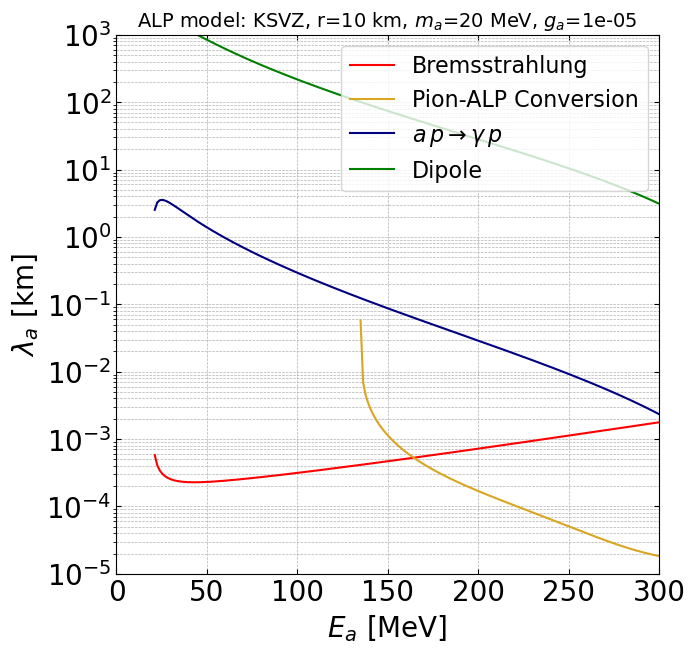

In [17]:
# Now lets plot it for an example
radTEST = 10 # km
maTEST = 20 # MeV
gaTEST = 1e-5


# and for a range of ALP energies
Ea_plt = np.linspace(0.1, 350, 250) # MeV


# Bremsstrahlung: dndEdt(self, Ea, rad, ma, ga)
lambdaam1_KSVZ_plt = [Units.kmminus1toMeV * brems_KSVZ.lambdaam1(EE, radTEST, maTEST, gaTEST)**(-1) for EE in Ea_plt]

# Pionic conversion: dndEdt(self, Ea, rad, ma, ga)
lambdaam1_pion_KSVZ_plt = [Units.kmminus1toMeV * pion_KSVZ.lambdaam1(EE, radTEST, maTEST, gaTEST)**(-1) for EE in Ea_plt]

# ALP photoproduction: dndEdt(self, Ea, rad, ma, ga)
lambdaam1_photon_KSVZ_plt = [Units.kmminus1toMeV * ALPphoton_KSVZ.lambdaam1(EE, radTEST, maTEST, gaTEST)**(-1) for EE in Ea_plt]

# Dipole interaction: dndEdt(self, Ea, rad, ma, ga)
lambdaam1_dipole_plt = [Units.kmminus1toMeV * ALPdipole.lambdaam1(EE, radTEST, maTEST, gaTEST)**(-1) for EE in Ea_plt]




# plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

plt.plot(Ea_plt, lambdaam1_KSVZ_plt, color='red', label=r"Bremsstrahlung")
plt.plot(Ea_plt, lambdaam1_pion_KSVZ_plt, color='goldenrod', linestyle='-', label=r"Pion-ALP Conversion")
plt.plot(Ea_plt, lambdaam1_photon_KSVZ_plt, color='navy', linestyle='-', label=r"$a \, p \rightarrow \gamma \, p$")
plt.plot(Ea_plt, lambdaam1_dipole_plt, color='green', linestyle='-', label=r"Dipole")

ax.set_xscale('linear')
ax.set_yscale('log')
ax.set_xlim(0, 300)
ax.set_ylim(1e-5,1e3)
ax.set_title(f'ALP model: KSVZ, r={radTEST} km, $m_a$={maTEST} MeV, $g_a$={gaTEST:.0e}', fontsize=14)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlabel("$E_a$ [MeV]", fontsize=20)
ax.set_ylabel(r"$\lambda_a$ [km]", fontsize=20)
ax.tick_params(direction='in', top=True, right=True)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend(loc="upper right", fontsize=16)
plt.show()

# 3. Production and Absorption

To compute the final ALP spectrum generated by a SN you need to consider both production and absorption.

For that you have class $\bf{SN\_particle\_generator}$ defined in the imported module $\bf{ALPint}$

Inputs:
- profile: the SN profiles
- lambdaam1_all: all the absorption processes/channels that you want to be considered
- dndEdt_all: all the production processes/channels that you want to be considered


Format of both lambdaam1_all and dndEdt_all:
- [func_process1, func_process2, ..., func_processN] or [None] if no process has to be considered
- each func_process needs to be a function with inputs (Ea, rad, ma, ga)

## 3.1 Bremsstrahlung and Pionic conversion

--------------------------------
In this first example we are only considering the most important processes: Bremsstrahlung and Pionic conversion

In [18]:
# only bremsstrahlung and pionic conversion

production = [brems_KSVZ.dndEdt,
              pion_KSVZ.dndEdt]
absorption = [brems_KSVZ.lambdaam1,  
              pion_KSVZ.lambdaam1]

generator_KSVZ = ALPint.SN_particle_generator( profile=SN_prof, lambdaam1_all=absorption, dndEdt_all=production)

### ALP spectra generated by a SN

Inside the class $\bf{SN\_particle\_generator}$ there is a function to compute the number of ALPs generated in a SN:

 - dNdEdt(Ea, ma, ga) $\, \rightarrow \,$ Units: adimensional

<img src="imgs/dNdE.png" alt="dNdE" width="800">
notice that the time integral is $\bf{not}$ done in the function dNdEdt

---------------

The absoption effects are included in:
<img src="imgs/abs1.png" alt="absorption1" width="500">
<img src="imgs/abs2.png" alt="absorption2" width="350">

---------------

And the energy of the ALP produced in rad=s is redshifted at rad=r as
<img src="imgs/redshiftedEa.png" alt="redshiftedEa" width="250">
<img src="imgs/lapse.png" alt="lapse" width="180">
with $\alpha$ the lapse function

##### Example for KSVZ model and fixed parameters

In [19]:
EaTEST = 50 # MeV
maTEST = 20 # MeV
gaTEST = 1e-5

In [20]:
# NOTICE THAT COMPUTING EACH POINT TAKES TIME

start_time = time.time()
print( generator_KSVZ.dNdEdt(EaTEST, maTEST, gaTEST) , "  [adimensional]")
print("--- %s seconds ---" % (time.time() - start_time))

1.706025477773018e+33   [adimensional]
--- 263.2304046154022 seconds ---


##### For the same example as before, lets plot the spectrum as a function of energy

To compute dN/dE we need to integrate in time.

We are going to assume that for log(10) seconds everything is constant, so we are multiplying by that quantity

In [89]:
SNtime = np.log(10)

Ea_plt = np.linspace(0, 200, 60) # MeV

dNdE_KSVZ_plt = [Units.stoMeVminus1 * SNtime * generator_KSVZ.dNdEdt(EE, maTEST, gaTEST) for EE in Ea_plt]

print(dNdE_KSVZ_plt)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.4985193729796623e+55, 3.152342971435705e+55, 3.4948030585964215e+55, 3.158954227122228e+55, 2.592624772698378e+55, 2.0104088998544257e+55, 1.5020269048637492e+55, 1.0921957435053469e+55, 7.781364008909395e+54, 5.455932790802246e+54, 3.776908888857798e+54, 2.586593340348296e+54, 1.756346732819064e+54, 1.1833061278384502e+54, 7.936568278391801e+53, 5.294489789741712e+53, 3.517531804094126e+53, 2.328121664433955e+53, 1.5363225345226542e+53, 1.0114535060195633e+53, 6.646842746367109e+52, 4.3620123209904065e+52, 2.8601902020687334e+52, 1.8744674603024347e+52, 1.228182229500259e+52, 8.047663995074676e+51, 5.276021640132528e+51, 3.462018552419809e+51, 2.274733699492954e+51, 1.4967415696909836e+51, 9.86891951576024e+50, 6.522049856676041e+50, 4.321839268004683e+50, 3.2607582443640465e+50, 2.0187814585414666e+50, 6.404450012736362e+49, 3.418874275069016e+49, 1.961745366611611e+49, 1.1536379551544227e+49, 6.899773451507402e+48, 4.148297442615951e+48, 2.5049255593

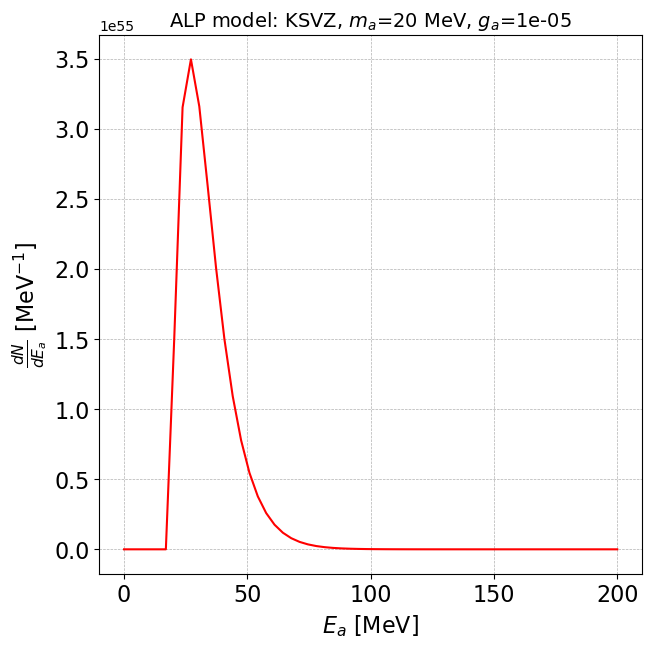

In [110]:
# plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

plt.plot(Ea_plt, dNdE_KSVZ_plt, color='red')

plt.xscale("linear")
plt.yscale("linear")
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.title(f'ALP model: KSVZ, $m_a$={maTEST} MeV, $g_a$={gaTEST:.0e}', fontsize=14)
plt.xlabel("$E_a$ [MeV]", fontsize=16)
plt.ylabel(r"$\frac{dN}{dE_a}$ [MeV$^{-1}$]", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

### Luminosity

<img src="imgs/ALPlumi.png" alt="ALPluminosity" width="500">

Inside the class $\bf{SN\_particle\_generator}$ there is a function to compute the ALP luminosity in a SN:

 - LaTest(ma, ga, L_neut=3e52)

where the 3rd input is the neutrino luminosity [erg s$^{-1}$] to test the Raffelt condition

Outputs an array with 3 elements:
- 1st: ALP luminosity in MeV$^{2}$
- 2nd: ALP luminosity in erg s$^{-1}$
- 3rd: ratio ALP luminosity / neutrino luminosity (if ratio > 1 $\rightarrow$ excluded, if ratio < 1 $\rightarrow$ allowed)

##### Example for KSVZ model and fixed parameters

In [21]:
maTEST = 20 # MeV
gaTEST = 1e-5

In [22]:
# NOTICE THAT COMPUTING EACH POINT TAKES TIME

start_time = time.time()
print( generator_KSVZ.LaTest(maTEST, gaTEST, L_neut=3e52, Nsamples=5) , "  (L$_a$ [MeV$^{2}$], L$_a$ [erg s$^{-1}$], L$_a$/L$_{\nu}$ )")
print("--- %s seconds ---" % (time.time() - start_time))

[6.30433094e+36 1.53459024e+52 5.11530079e-01]   (L$_a$ [MeV$^{2}$], L$_a$ [erg s$^{-1}$], L$_a$/L$_{
u}$ )
--- 586.6681423187256 seconds ---


#### Let's compute the Coolong Bounds

Inside the class $\bf{SN\_particle\_generator}$ there is a function to compute the ALP luminosity in a SN:

 - La(ma, ga) $\, \rightarrow \,$ Units: [MeV$^2$]

same as the other function LaTEST, but just provides as output the ALP luminosity in MeV$^{2}$

##### massless ALPs

In [262]:
# grid
ma_vals = 0.1
ga_vals = np.logspace(-10, -4, 20)


# evaluate
La_vals = [generator_KSVZ.La(ma_vals, GA, 5) * Units.MeVtoerg * Units.stoMeVminus1 for GA in ga_vals]


# same size as ga_vals
ma_vals_fixed = np.full_like(ga_vals, ma_vals) 

# save
np.savetxt("tutorial_results/La_KSVZ_massless_coolingbounds.dat", 
           np.column_stack((ma_vals_fixed, ga_vals, La_vals)), 
           fmt="%.6e", header="# m_a[MeV] g_a L_a[erg s^-1]", comments="")

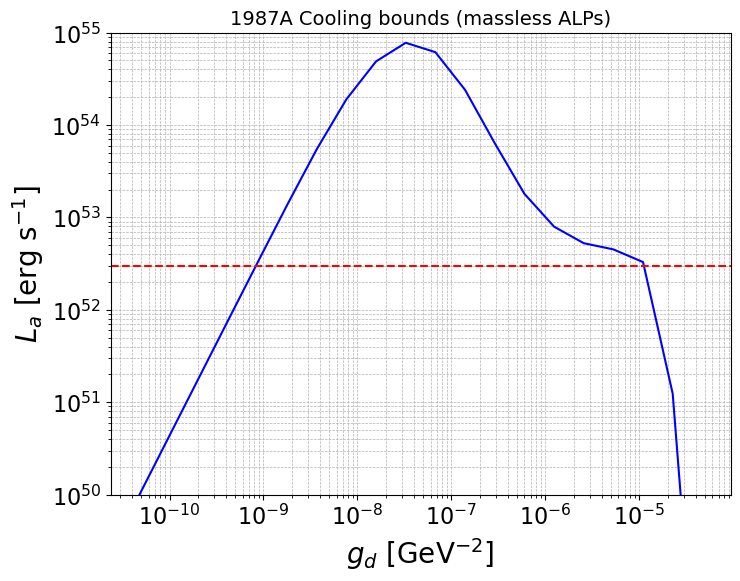

In [23]:
# load
data = np.loadtxt("tutorial_results/La_KSVZ_massless_coolingbounds.dat")
X_loaded, Y_loaded, Z_loaded = data[:, 0], data[:, 1], data[:, 2]

# g_ap = C_ap * g_a
Y_loaded = Y_loaded * 0.47
    
    
# neutrino luminosity
L_neut = 3e52 # erg s^-1


# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

plt.plot(Y_loaded, Z_loaded, color='blue')
plt.axhline(y=L_neut, color='red', linestyle='--')

# plt.xlim(1e-10,1e3)
plt.ylim(1e50,1e55)
plt.xscale("log")
plt.yscale("log")
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.title("1987A Cooling bounds (massless ALPs)", fontsize=14)
plt.xlabel(r"$g_d$ [GeV$^{-2}$]", fontsize= 20)
plt.ylabel(r"$L_a$ [erg s$^{-1}$]", fontsize= 20)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

##### massless and massive ALPs

In [94]:
La_vectorized = np.vectorize(generator_KSVZ.La)

# grid
ma_vals = np.array([1e-10, 0.1, 1, 5, 10, 20, 50, 100, 200, 300])
ga_vals = np.logspace(-9, -4.6, 10)


MA, GA = np.meshgrid(ma_vals, ga_vals)  # meshgrid
La_vals = La_vectorized(MA, GA, 5) * Units.MeVtoerg * Units.stoMeVminus1  # evaluate


# save
np.savetxt("tutorial_results/La_KSVZ_coolingbounds.dat", 
           np.c_[MA.ravel(), GA.ravel(), La_vals.ravel()], 
           header="# m_a[MeV] g_a L_a[erg s^-1]")

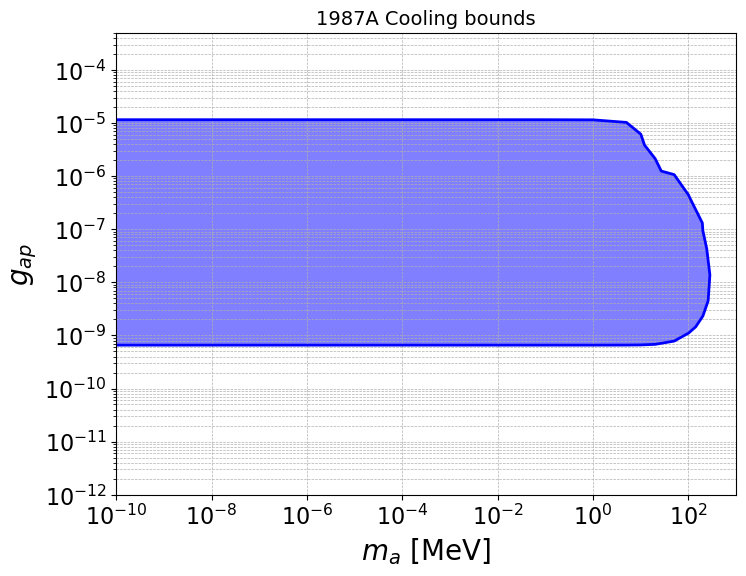

In [24]:
# load
data = np.loadtxt("tutorial_results/La_KSVZ_coolingbounds.dat")
X_loaded, Y_loaded, Z_loaded = data[:, 0], data[:, 1], data[:, 2]

# g_ap = C_ap * g_a
Y_loaded = Y_loaded * 0.47


# make the mesh
x_unique = np.unique(X_loaded)
y_unique = np.unique(Y_loaded)

X_grid, Y_grid = np.meshgrid(x_unique, y_unique)

Z_grid = np.zeros_like(X_grid)

# Z values
for i in range(len(X_loaded)):
    x_idx = np.where(x_unique == X_loaded[i])[0][0]
    y_idx = np.where(y_unique == Y_loaded[i])[0][0]
    Z_grid[y_idx, x_idx] = Z_loaded[i]

    
    
# neutrino luminosity
L_neut = 3e52 # erg s^-1
threshold = L_neut



# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

plt.contour(X_grid, Y_grid, Z_grid, levels=[threshold], colors='blue', linewidths=2, linestyles='-')
plt.contourf(X_grid, Y_grid, Z_grid, levels=[threshold, Z_loaded.max()], colors=["blue"], alpha=0.5)

plt.xlim(1e-10,1e3)
plt.ylim(1e-12,5e-4)
plt.xscale("log")
plt.yscale("log")
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.title("1987A Cooling bounds", fontsize=14)
plt.xlabel(r"$m_a$ [MeV]", fontsize= 20)
plt.ylabel(r"$g_{ap}$", fontsize= 20)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

## 3.2 Dipole interaction only

In this example we are going to consider only Dipole Interaction for both production and absorption.

G. Lucente, L. Mastrototaro, P. Carenza, L. Di Luzio, M. Giannotti, A. Mirizzi, Axion signatures from supernova explosions through the nucleon electric-dipole portal, Phys. Rev. D 105, 123020 (2022) [2203.15812]

In [36]:
# only dipole interaction

production = [ALPdipole.dndEdt]
absorption = [ALPdipole.lambdaam1]

generator_KSVZ = ALPint.SN_particle_generator( profile=SN_prof, lambdaam1_all=absorption, dndEdt_all=production)

##### Example ALP spectra

In [37]:
EaTEST = 100 # MeV
maTEST = 0.1 # MeV
gaTEST = 1.6e-6

print("for this ga, the gd =", ALPdipole.gdn(gaTEST), r"MeV^{-2} =", ALPdipole.gdn(gaTEST)*1e6, r"GeV^{-2}")

for this ga, the gd = 6.001063824950787e-15 MeV^{-2} = 6.001063824950786e-09 GeV^{-2}


In [38]:
# NOTICE THAT COMPUTING EACH POINT TAKES TIME

start_time = time.time()
print( generator_KSVZ.dNdEdt(EaTEST, maTEST, gaTEST) , "  [adimensional]")
print("--- %s seconds ---" % (time.time() - start_time))

6.64829435842285e+32   [adimensional]
--- 232.53846383094788 seconds ---


In [55]:
# NOTICE THAT COMPUTING EACH POINT TAKES TIME

start_time = time.time()
print( generator_KSVZ.dNdEdt2(EaTEST, maTEST, gaTEST, Nsamples=int(2e4)) , "  [adimensional]")
print("--- %s seconds ---" % (time.time() - start_time))

3.6487254691713234e+28   [adimensional]
--- 495.04745984077454 seconds ---


##### For the same example as before, lets plot the spectrum as a function of energy

To compute dN/dE we need to integrate in time.

We are going to assume that for log(10) seconds everything is constant, so we are multiplying by that quantity

In [251]:
SNtime = np.log(10)

Ea_plt = np.linspace(20, 250, 25) # MeV

dNdE_dipole_plt = [Units.stoMeVminus1 * SNtime * generator_KSVZ.dNdEdt(EE, maTEST, gaTEST) for EE in Ea_plt]

print(dNdE_dipole_plt)

[1.8375864470647952e+53, 5.051565868335686e+53, 9.267688716681113e+53, 1.3778430493526568e+54, 1.7875068272183344e+54, 2.1051145274235013e+54, 2.3056035785226654e+54, 2.3858373256478146e+54, 2.3574959928817163e+54, 2.240984929600739e+54, 2.060548450249749e+54, 1.8406960063823047e+54, 1.6036129799244785e+54, 1.3672248470623934e+54, 1.1443002509283549e+54, 9.42498115485809e+53, 7.650908784316789e+53, 6.123403087867861e+53, 4.837788796444916e+53, 3.796269849912354e+53, 2.9820664176246917e+53, 2.3420328226119523e+53, 1.8349822455876713e+53, 1.4341243455991224e+53, 1.1178876953695857e+53]


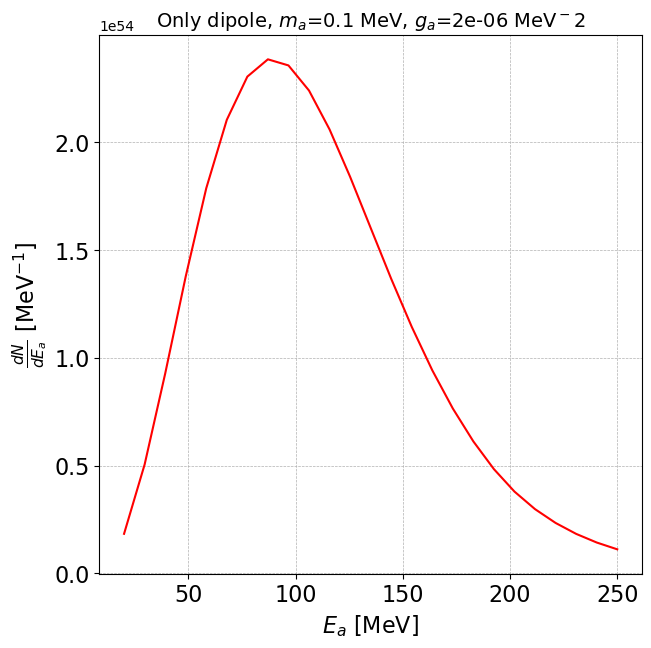

In [252]:
# plot
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111)

plt.plot(Ea_plt, dNdE_dipole_plt, color='red')

plt.xscale("linear")
plt.yscale("linear")
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.title(f'Only dipole, $m_a$={maTEST} MeV, $g_a$={gaTEST:.0e} MeV$^{-2}$', fontsize=14)
plt.xlabel("$E_a$ [MeV]", fontsize=16)
plt.ylabel(r"$\frac{dN}{dE_a}$ [MeV$^{-1}$]", fontsize=16)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
# plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.show()

### Luminosity

In [13]:
maTEST = 0.1 # MeV
gaTEST = 1.6e-6

print("for this ga, the gd =", ALPdipole.gdn(gaTEST), r"MeV^{-2} =", ALPdipole.gdn(gaTEST)*1e6, r"GeV^{-2}")

for this ga, the gd = 6.001063824950787e-15 MeV^{-2} = 6.001063824950786e-09 GeV^{-2}


In [14]:
# NOTICE THAT COMPUTING EACH POINT TAKES TIME

start_time = time.time()
print( generator_KSVZ.LaTest(maTEST, gaTEST, L_neut=3e52, Nsamples=5) , "  (L$_a$ [MeV$^{2}$], L$_a$ [erg s$^{-1}$], L$_a$/L$_{\nu}$ )")
print("--- %s seconds ---" % (time.time() - start_time))

[6.25172043e+36 1.52178387e+52 5.07261290e-01]   (L$_a$ [MeV$^{2}$], L$_a$ [erg s$^{-1}$], L$_a$/L$_{
u}$ )
--- 540.5667736530304 seconds ---


##### Let's compute the Coolong Bounds

Inside the class $\bf{SN\_particle\_generator}$ there is a function to compute the ALP luminosity in a SN:

 - La(ma, ga) $\, \rightarrow \,$ Units: [MeV$^2$]

same as the other function LaTEST, but just provides as output the ALP luminosity in MeV$^{2}$

In [15]:
print(ALPdipole.gaa(1e-9/(1e6)))
print(ALPdipole.gaa(1e-3/(1e6)))

2.6661939393939396e-07
0.266619393939394


In [29]:
# grid
ma_vals = 0.1
ga_vals = np.logspace(-7, -0.5, 20)


# evaluate
La_vals = [generator_KSVZ.La(ma_vals, GA, 5) * Units.MeVtoerg * Units.stoMeVminus1 for GA in ga_vals]


# same size as ga_vals
ma_vals_fixed = np.full_like(ga_vals, ma_vals) 

# save
np.savetxt("tutorial_results/La_dipole_massless_coolingbounds.dat", 
           np.column_stack((ma_vals_fixed, ga_vals, La_vals)), 
           fmt="%.6e", header="# m_a[MeV] g_a L_a[erg s^-1]", comments="")

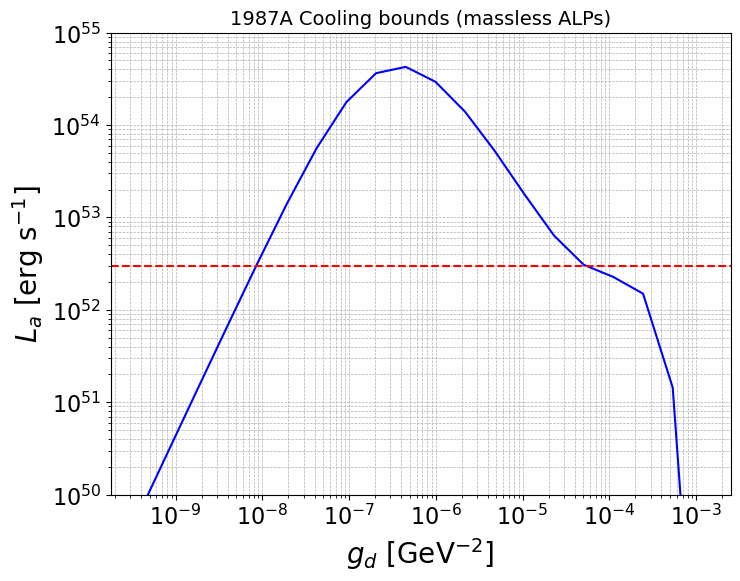

In [35]:
# load
data = np.loadtxt("tutorial_results/La_dipole_massless_coolingbounds.dat")
X_loaded, Y_loaded, Z_loaded = data[:, 0], data[:, 1], data[:, 2]

# g_dn = C_angamma * g_a / mn**2
Y_loaded = ALPdipole.gdn(Y_loaded)*1e6
    
    
# neutrino luminosity
L_neut = 3e52 # erg s^-1


# Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)

plt.plot(Y_loaded, Z_loaded, color='blue')
plt.axhline(y=L_neut, color='red', linestyle='--')

# plt.xlim(1e-10,1e3)
plt.ylim(1e50,1e55)
plt.xscale("log")
plt.yscale("log")
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
plt.title("1987A Cooling bounds (massless ALPs)", fontsize=14)
plt.xlabel(r"$g_d$ [GeV$^{-2}$]", fontsize= 20)
plt.ylabel(r"$L_a$ [erg s$^{-1}$]", fontsize= 20)
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()